# Table of Contents
 <p><div class="lev1"><a href="#多変量解析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>多変量解析</a></div><div class="lev2"><a href="#Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem</a></div><div class="lev3"><a href="#キバハリアリの特徴-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>キバハリアリの特徴</a></div><div class="lev2"><a href="#Plan1：データ収集の計画-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plan1：データ収集の計画</a></div><div class="lev2"><a href="#Plan2：データ解析の計画-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plan2：データ解析の計画</a></div><div class="lev2"><a href="#Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data</a></div><div class="lev2"><a href="#Analysis:重回帰-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Analysis:重回帰</a></div><div class="lev3"><a href="#(1)-csvデータの読み込み-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>(1) csvデータの読み込み</a></div><div class="lev3"><a href="#(2)欠損値の操作-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>(2)欠損値の操作</a></div><div class="lev3"><a href="#(3)基本統計量を確認-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>(3)基本統計量を確認</a></div><div class="lev3"><a href="#(3)-statsmodels-で回帰モデル-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>(3) statsmodels で回帰モデル</a></div><div class="lev3"><a href="#変数選択-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>変数選択</a></div><div class="lev4"><a href="#欠損値なしデータから変数の候補を見つける-1.5.5.1"><span class="toc-item-num">1.5.5.1&nbsp;&nbsp;</span>欠損値なしデータから変数の候補を見つける</a></div><div class="lev4"><a href="#候補変数から変数選択をする-1.5.5.2"><span class="toc-item-num">1.5.5.2&nbsp;&nbsp;</span>候補変数から変数選択をする</a></div><div class="lev3"><a href="#残差とテコ比の検討-1.5.6"><span class="toc-item-num">1.5.6&nbsp;&nbsp;</span>残差とテコ比の検討</a></div><div class="lev4"><a href="#inflence-plot-1.5.6.1"><span class="toc-item-num">1.5.6.1&nbsp;&nbsp;</span>inflence plot</a></div><div class="lev5"><a href="#テコ比の二乗プロット-Leverage-Resid2-Plot-1.5.6.1.1"><span class="toc-item-num">1.5.6.1.1&nbsp;&nbsp;</span>テコ比の二乗プロット Leverage-Resid2 Plot</a></div><div class="lev3"><a href="#回帰式の利用-1.5.7"><span class="toc-item-num">1.5.7&nbsp;&nbsp;</span>回帰式の利用</a></div><div class="lev4"><a href="#statsmodelでの予測区間をチェック-1.5.7.1"><span class="toc-item-num">1.5.7.1&nbsp;&nbsp;</span>statsmodelでの予測区間をチェック</a></div><div class="lev4"><a href="#信頼区間,予測区間を計算して予測-1.5.7.2"><span class="toc-item-num">1.5.7.2&nbsp;&nbsp;</span>信頼区間,予測区間を計算して予測</a></div>

In [1]:
# scipy
import scipy as sp
import scipy.stats as stats 

# pandas 
import pandas as pd

# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm
fp = fm.FontProperties(fname='/Windows/Fonts/YuGothM.ttc')

# 多変量解析

## Problem

「キバハアリの頭幅は各部位の大きさによって決まるのか」

をいう問題を考える．


### キバハリアリの特徴

>キバハリアリはオーストラリア大陸およびその周辺に分布（生息）するアリで，
キバハリアリ属として知られている，このアリは，"bulldog ants" と呼ばれ，
多くのアリ研究者や生物学者の注目を集めている．
その理由はキバハリアリがアリ科(family Formicidae)の中でも祖先的な形質を多く持っていて，
"原始的"なアリとされているためである．

> いくつかの種は"jack jumper" と言われるように，飛び跳ねることができる．

> ほとんどの種はかなり攻撃的で，人が刺されるとアレルギーになったり，死ぬことさえある．

>NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.130 9.1.キバハリアリの特徴

- キバハリアリの外見の特徴

外見の特徴は，

> - (1)非常に大きなあご
> - (2)発達した複眼と単眼
> - (3)明瞭に区別される胸部の亜区分
> - (4)2つの節からなる腹柄
> - (5)強力で機能的な刺針

> NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.130 9.1.キバハリアリの特徴

となっている．

キバハリアリの画像は，

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/a6/Bullant_apr07.jpg" title="キバハリアリ" width="60%"/>
> ブルドック属 - Wikipedia https://ja.wikipedia.org/wiki/%E3%83%96%E3%83%AB%E3%83%89%E3%83%83%E3%82%B0%E3%82%A2%E3%83%AA%E5%B1%9E

myrmesia という名前について：

>ファブリキウスは1804年に新属Myrmecia（キバハリアリ属）を創設する

>ブルドック属 - Wikipedia https://ja.wikipedia.org/wiki/%E3%83%96%E3%83%AB%E3%83%89%E3%83%83%E3%82%B0%E3%82%A2%E3%83%AA%E5%B1%9E 

キバハリアリの頭の画像は，

><img src="https://upload.wikimedia.org/wikipedia/commons/2/2c/Bullant_head_detail.jpg" width="50%" title="キバハリアリの頭">
> ブルドック属 - Wikipedia https://upload.wikimedia.org/wikipedia/commons/2/2c/Bullant_head_detail.jpg" 

## Plan1：データ収集の計画

今回は，既に収集されているデータを使う．

モデルに扱う変数はすべて量的変数とする．

## Plan2：データ解析の計画

- 単回帰

目的変数$y$を頭幅，説明変数をほかの部位$x_1$ として

$$
y = \beta_0 + \beta_1 x_{1} + \varepsilon , 
\varepsilon \sim N(0, \sigma^2)
$$

または

- 重回帰

$$
y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \cdots + \beta_{p}x_{p} + \varepsilon, 
(p <= 12), 
\varepsilon \sim N(0, \sigma^2)
$$

で説明できないかを考える．

## Data

キバハリアリの各部位を計測したデータセットには，Ogata(1991)氏が測定したものがある．
今回は，「NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.197-201, 付録Dキバハリアリの部位測定データ」に載っているデータを使用した．

計測部位（特性，変数）は，$12$個からなる．

全標本数（標本の大きさ）は，$N=252$になる．

> NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.131 9.2データセットの特徴

種群(SPGroup)は9つに分かれている．
Wikipedeia に書かれている各種の特徴を並べると，

- aberrans
- cephalotes
- gulosa

>英名にはGiant bulldog ant、Red bulldog antなどがある。働きアリの体長は15〜26mm。25mmを超えるインチ・アンツの一つ。キバハリアリ亜科全体の基準種であると同時に、オオキバハリアリ亜属の基準種に位置づけられる。
>
>首都キャンベラやシドニーといった大都市周辺で最も普通にみられるキバハリアリである。また、多摩動物公園昆虫園で飼育展示されたり、ペットとして時折輸入されたりもするなど、日本国内で姿を見る機会の比較的多い種である。黒い腹端以外の体色は鮮やかな赤褐色。

- mandibularis
- nigrocincta
>nigrocincta亜属の基準種。本種もしばしば「ジャック・ジャンパー」と呼ばれることがある。頭部は黒色だが、胸部〜腹部は赤褐色と黒色の大まかな縞模様。大顎、触角、脛節はより明るい赤褐色である。

- picta

- pilosula 

>ジャックジャンパーアント亜属の基準種。タスマニア島〜オーストラリア最南端付近に分布する。
働きアリの体長は12〜14mm、女王は14〜16mm。体色は若干赤みがかりにぶい光沢のある黒褐色で、脚と触角はやや明るい赤褐色。キバハリアリとしてはやや小型であるが、敵や獲物に飛び跳ねて襲いかかるため、「ジャック・ジャンパー」の渾名で知られる。前方跳躍蟻、ジャンパーに類別されるキバハリアリの最も有名な種の一つ。 

> 首都キャンベラ近郊の住宅造成地、農場にも生息するため、刺される被害が多い。本種の毒は人体にアレルギーを生じさせやすく、アナフィラキシーショックによって最悪死亡する例もある。

- tepperi

- urens

>- [https://ja.wikipedia.org/wiki/%E3%83%96%E3%83%AB%E3%83%89%E3%83%83%E3%82%B0%E3%82%A2%E3%83%AA%E5%B1%9E#.E3.81.8A.E3.82.82.E3.81.AA.E7.A8.AE]
>- NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.131 9.2データセットの特徴


Data

計測した部位は以下になる．

- HW(Head Width):頭幅
- HL(Head Length):頭長
- SL(Space Length): 柄節長
- ML(Mandible Length): 大あご長
- WL(Weber's Length of mesosoma): ウェーバーの胸長
- PrW(Pronotal width): 前胸幅
- HFL(Hind femoral Length): 後脚腿節長
- PtW(Petiole Width): 腹柄節幅
- PtL(Petiole Length): 腹柄節長
- Ppw(Postpetiole Width): 後柄節幅
- PpL(Postpetiole Length): 後柄節長
- GW(Gastral width):腹部幅

計測値は $20$ で割ると $[mm]$ の単位になる．
つまり，$20[mm]$ を1単位として計測している．


表の中のデータの "-" は欠損値を表す．

部位を図で表すと，

> <img  src="https://github.com/Cartman0/myrmesia_data/blob/master/img/myrmesia_region_measurement.jpg?raw=true"/>
> NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.130 図9.1キバハリアリの計測部位

## Analysis:重回帰

- 頭幅 $hw$ を目的変数
- その他の変数を説明変数

とするような重回帰を考える．
変数選択をし，もっともよく目的変数を説明できる変数のみを求める．

### (1) csvデータの読み込み

(1). まず，pandasでcsvデータを読む．

In [2]:
myrmesia_df = pd.read_csv("myrmesia_data.csv", encoding="utf-8")
myrmesia_df.head(5)

,ID-SpeciesName,SPGroup,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
0,01aberrans,aberrans,59,58,40,47,84,40,60,20,25,34,26,50
1,02aberrans,aberrans,53,53,37,40,77,34,58,18,22,30,24,45
2,03aberrans,aberrans,63,61,41,48,89,40,65,22,25,38,28,55
3,01excavata,aberrans,57,55,37,44,82,39,56,20,25,33,22,48
4,02excavata,aberrans,53,52,35,41,75,35,50,17,22,30,21,43


In [3]:
# 全標本数を確認
total_n = myrmesia_df["ID-SpeciesName"].count()
total_n

252

### (2)欠損値の操作

今回は欠損値のある標本を除外する．

In [4]:
# 欠損値"-"の抽出してNanに置き換え
myrmesia_nan = myrmesia_df.copy()
myrmesia_nan[myrmesia_df=="-"] = sp.nan
myrmesia_nan.head(9)

,ID-SpeciesName,SPGroup,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
0,01aberrans,aberrans,59,58,40,47,84,40,60,20,25,34,26,50
1,02aberrans,aberrans,53,53,37,40,77,34,58,18,22,30,24,45
2,03aberrans,aberrans,63,61,41,48,89,40,65,22,25,38,28,55
3,01excavata,aberrans,57,55,37,44,82,39,56,20,25,33,22,48
4,02excavata,aberrans,53,52,35,41,75,35,50,17,22,30,21,43
5,01froggatti,aberrans,66,61,45,51,95,42,66,23,27,40,25,55
6,01maura,aberrans,69,67,43,50,90,44,69,25,27,40,26,59
7,02maura,aberrans,62,62,41,45,88,40,65,21,25,37,22,55
8,03maura,aberrans,65,63,40,50,NaN,NaN,NaN,NaN,NaN,38,NaN,56


In [5]:
#欠損値を除外
myrmesia_remNan = myrmesia_nan.dropna(axis=0)
myrmesia_remNan.head(9)

,ID-SpeciesName,SPGroup,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
0,01aberrans,aberrans,59,58,40,47,84,40,60,20,25,34,26,50
1,02aberrans,aberrans,53,53,37,40,77,34,58,18,22,30,24,45
2,03aberrans,aberrans,63,61,41,48,89,40,65,22,25,38,28,55
3,01excavata,aberrans,57,55,37,44,82,39,56,20,25,33,22,48
4,02excavata,aberrans,53,52,35,41,75,35,50,17,22,30,21,43
5,01froggatti,aberrans,66,61,45,51,95,42,66,23,27,40,25,55
6,01maura,aberrans,69,67,43,50,90,44,69,25,27,40,26,59
7,02maura,aberrans,62,62,41,45,88,40,65,21,25,37,22,55
9,01forrnosa,aberrans,62,60,41,47,87,40,65,20,24,34,25,48


In [6]:
myrmesia_remNan.loc[:,"HW":].head()

,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
0,59,58,40,47,84,40,60,20,25,34,26,50
1,53,53,37,40,77,34,58,18,22,30,24,45
2,63,61,41,48,89,40,65,22,25,38,28,55
3,57,55,37,44,82,39,56,20,25,33,22,48
4,53,52,35,41,75,35,50,17,22,30,21,43


量的データをint型にする．

In [7]:
# 数値データをintへ変換
myrmesia_remNan_int = myrmesia_remNan.copy()
myrmesia_remNan_int[["HW", "HL", "SL", "ML", "WL", "PrW", "HFL", "PtW", "PtL", "Ppw", "PpL", "GW"]] = myrmesia_remNan.iloc[:, 2:].astype(int)
myrmesia_remNan_int.dtypes

ID-SpeciesName    object
SPGroup           object
HW                 int32
HL                 int32
SL                 int32
ML                 int32
WL                 int32
PrW                int32
HFL                int32
PtW                int32
PtL                int32
Ppw                int32
PpL                int32
GW                 int32
dtype: object

In [8]:
# 標本数を確認
n = myrmesia_remNan_int["ID-SpeciesName"].count()
n

99

### (3)基本統計量を確認

In [9]:
myrmesia_remNan_int.describe()

,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,48.949495,46.555556,39.979798,46.040404,78.656566,34.252525,57.888889,19.777778,24.171717,31.656566,22.484848,45.838384
std,9.190028,8.190615,7.492826,7.498189,12.686295,6.548630,11.203943,3.869176,3.953919,6.465231,4.250723,8.360142
min,23.000000,23.000000,19.000000,23.000000,41.000000,15.000000,29.000000,10.000000,14.000000,15.000000,10.000000,22.000000
25%,44.000000,43.000000,36.500000,43.000000,72.000000,30.000000,53.500000,18.000000,22.000000,28.000000,20.000000,41.500000
50%,49.000000,47.000000,40.000000,47.000000,82.000000,35.000000,59.000000,20.000000,25.000000,31.000000,23.000000,45.000000
75%,55.000000,50.000000,45.000000,50.000000,88.000000,39.000000,65.000000,22.500000,27.000000,35.500000,25.000000,50.000000
max,69.000000,67.000000,55.000000,63.000000,97.000000,48.000000,82.000000,29.000000,34.000000,47.000000,33.000000,67.000000


散布行列をプロット

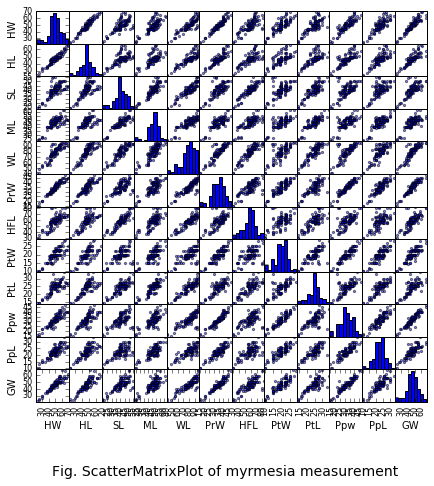

In [10]:
%matplotlib inline

pd.tools.plotting.scatter_matrix(myrmesia_remNan_int, figsize=(7,7), grid=True)
plt.suptitle("Fig. ScatterMatrixPlot of myrmesia measurement", y=0, fontsize=14)
plt.show()

どの変数も正の相関があることがわかる．

相関係数行列

In [11]:
myrmesia_remNan_int.corr()

,HW,HL,SL,ML,WL,PrW,HFL,PtW,PtL,Ppw,PpL,GW
HW,1.000000,0.959212,0.727289,0.779383,0.878143,0.956496,0.752532,0.823289,0.769129,0.882624,0.833379,0.926137
HL,0.959212,1.000000,0.711152,0.713412,0.866725,0.888452,0.767482,0.732271,0.747560,0.793887,0.786740,0.870408
SL,0.727289,0.711152,1.000000,0.873805,0.901756,0.728793,0.910752,0.625300,0.836738,0.601027,0.671827,0.755955
ML,0.779383,0.713412,0.873805,1.000000,0.848662,0.809835,0.764182,0.775155,0.857812,0.724168,0.802318,0.765176
WL,0.878143,0.866725,0.901756,0.848662,1.000000,0.886995,0.907666,0.743277,0.887321,0.788177,0.804483,0.883363
PrW,0.956496,0.888452,0.728793,0.809835,0.886995,1.000000,0.742914,0.891044,0.795159,0.943223,0.888162,0.949264
HFL,0.752532,0.767482,0.910752,0.764182,0.907666,0.742914,1.000000,0.596369,0.796040,0.623804,0.664276,0.784178
PtW,0.823289,0.732271,0.625300,0.775155,0.743277,0.891044,0.596369,1.000000,0.759568,0.927784,0.855986,0.876483
PtL,0.769129,0.747560,0.836738,0.857812,0.887321,0.795159,0.796040,0.759568,1.000000,0.714057,0.824946,0.776912
Ppw,0.882624,0.793887,0.601027,0.724168,0.788177,0.943223,0.623804,0.927784,0.714057,1.000000,0.868284,0.928559


### (3) statsmodels で回帰モデル

R-likeにモデルを指定するには，

```
statsmodels.formula.api.ols
```

参考
- http://statsmodels.sourceforge.net/devel/example_formulas.html

In [12]:
print(smf.ols.__doc__)


        Create a Model from a formula and dataframe.

        Parameters
        ----------
        formula : str or generic Formula object
            The formula specifying the model
        data : array-like
            The data for the model. See Notes.
        subset : array-like
            An array-like object of booleans, integers, or index values that
            indicate the subset of df to use in the model. Assumes df is a
            `pandas.DataFrame`
        args : extra arguments
            These are passed to the model
        kwargs : extra keyword arguments
            These are passed to the model with one exception. The
            ``eval_env`` keyword is passed to patsy. It can be either a
            :class:`patsy:patsy.EvalEnvironment` object or an integer
            indicating the depth of the namespace to use. For example, the
            default ``eval_env=0`` uses the calling namespace. If you wish
            to use a "clean" environment set ``eval_env=-1

In [13]:
lmodel = smf.ols('HW ~ HL + SL + ML + WL + PrW + HFL + PtW + PtL + Ppw + PpL + GW', data=myrmesia_remNan_int.loc[:, "HW":"GW"])
lmodel

In [14]:
fit = lmodel.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HW   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     330.2
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           6.04e-66
Time:                        21:00:13   Log-Likelihood:                -173.67
No. Observations:                  99   AIC:                             371.3
Df Residuals:                      87   BIC:                             402.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1434      1.130     -1.897      0.061        -4.389     0.102
HL             0.6395      0.048     13.389      0.000         0.545     0.734
SL             0.0286      0.083      0.345      0.731        -0.136     0.193
ML             0.1405      0.063      2.247      0.027         0.016     0.265
WL            -0.0924      0.059     -1.556      0.123        -0.210     0.026
PrW            0.6575      0.119      5.544      0.000         0.422     0.893
HFL           -0.0437      0.041     -1.066      0.289        -0.125     0.038
PtW           -0.1563      0.134     -1.170      0.245        -0.422     0.109
PtL            0.0281      0.110      0.256      0.798        -0.190     0.246
Ppw            0.0996      0.115      0.868      0.388        -0.128     0.328
PpL           -0.2194      0.095     -2.305      0.024        -0.409    -0.030
GW             0.1130      0.082      1.379      0.171        -0.050     0.276
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.066
Skew:                          -0.059   Prob(JB):                        0.967
Kurtosis:                       3.045   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

変数をすべて（$12$個）含んだ回帰式の性能は，

- 寄与率 $0.977$
- 自由度調整済寄与率 $0.97365$
- $AIC(12) = 371.3$

In [15]:
fit.rsquared_adj

0.97365260334015702

In [16]:
fit.aic

371.34322280217464

### 変数選択

AICを使って，変数選択を行う．

stastmodels 

定数項ありでは， 
 
$$
AIC(df_{model}) = -2 \ln{lf} + 2(df_{model} + 1).
$$

多項式の回帰より，おそらく

$$
AIC(p) = n \ln (2\pi \frac{S_e}{n}) + n + 2p
$$

- $p$: 自由パラメータ数
 
 http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html

In [17]:
def AIC_polynomial(n, p, Se):
    return n * sp.log(2 * sp.pi * Se / n) + n + 2 * p

残差平方和は，`fit()`関数の返り値

```
statsmodels.regression.linear_model.RegressionResults.ssr

```

で求められる．

In [18]:
AIC_polynomial(99, 12, fit.ssr)

371.34322280217464

#### 欠損値なしデータから変数の候補を見つける

欠損値なしデータから，AICの小さい順上位3位を見て変数の候補を見つける．

Rにはstep関数で変数を総当たりして，
AICの一番小さいモデルを求めてくれるが，statsmodelsには無いので自分で作る．

In [19]:
# 参考：http://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f

import itertools

def step(df, model):
    '''
    Returns:
        - Dataframe:
            index = pair exog
            columns = AIC, F0, adj.R^2
    '''
    exog = sp.array(model.exog_names)
    exog = exog[exog!="Intercept"]
    candi_exogs = []
    AICs = []
    for k in range(1,len(exog)+1):
        for candi_exog in itertools.combinations(exog, k):
            # Combination of exogs
            predictors_df = df[list(candi_exog)].copy()           
            predictors_df['Intercept'] = 1
            res = sm.OLS(model.endog, predictors_df).fit()
            candi_exogs.append(str(candi_exog))
            AICs.append([res.aic, res.fvalue, res.rsquared_adj])
    return pd.DataFrame(AICs, columns=["AIC", "F0", "R2_adj"], index=candi_exogs)

In [20]:
aic_df = step(myrmesia_remNan_int, lmodel)
aic_df.sort_values("AIC").head()

,AIC,F0,R2_adj
"('HL', 'ML', 'WL', 'PrW', 'PpL', 'GW')",364.432664,620.074977,0.974295
"('HL', 'ML', 'WL', 'PrW', 'HFL', 'PpL', 'GW')",365.106519,532.980602,0.974358
"('HL', 'ML', 'WL', 'PrW', 'PpL')",365.163714,731.205548,0.973860
"('HL', 'ML', 'WL', 'PrW', 'Ppw', 'PpL')",365.334548,614.312728,0.974060
"('HL', 'ML', 'PrW', 'HFL', 'PpL', 'GW')",365.387105,613.978555,0.974046


AICが1番小さいモデルは $HL', 'ML', 'WL', 'PrW', 'PpL', 'GW'$であった．

#### 候補変数から変数選択をする

AICの小さい順で見ると

- $HL, ML, WL, PrW, PpL, GW$ 

が選択される．



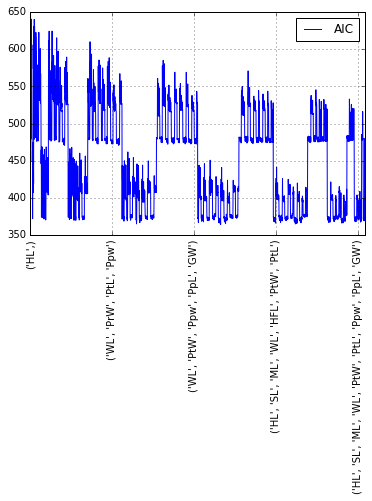

In [21]:
%matplotlib inline

aic_df.plot(y="AIC", grid=True, rot=90)
# plt.xticks()
plt.show()

よって，

変数は，

- HL(Head Length):頭長
- ML(Mandible Length): 大あご長
- WL(Weber's Length of mesosoma): ウェーバーの胸長
- PrW(Pronotal width): 前胸幅
- PpL(Postpetiole Length): 後柄節長
- GW(Gastral width):腹部幅

が選ばれる．

In [22]:
opt_model = smf.ols(formula="HW ~ HL + ML + WL + PrW + PpL + GW", data=myrmesia_remNan_int)
opt_fit = opt_model.fit()
opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HW   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     620.1
Date:                Sun, 01 Jan 2017   Prob (F-statistic):           4.27e-72
Time:                        21:00:19   Log-Likelihood:                -175.22
No. Observations:                  99   AIC:                             364.4
Df Residuals:                      92   BIC:                             382.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.9965      1.020     -1.957      0.053        -4.023     0.030
HL             0.6304      0.044     14.299      0.000         0.543     0.718
ML             0.1235      0.042      2.910      0.005         0.039     0.208
WL            -0.1006      0.034     -2.980      0.004        -0.168    -0.034
PrW            0.7042      0.094      7.525      0.000         0.518     0.890
PpL           -0.2100      0.080     -2.611      0.011        -0.370    -0.050
GW             0.0965      0.060      1.604      0.112        -0.023     0.216
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.089
Skew:                          -0.066   Prob(JB):                        0.956
Kurtosis:                       2.934   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

得られた回帰モデルは，

$$
\hat{HW}
= -2  + 0.6 HL + 0.1 ML -0.1 WL + 0.7 PrW-0.2 PpL + 0.1 GW\\
= 0.1\{(7 PrW + GW) + ((6HL + ML) - (WL+2PpL)) -20\}  
$$


> <img  src="https://github.com/Cartman0/myrmesia_data/blob/master/img/myrmesia_region_measurement.jpg?raw=true"/>
> NagatomoNakamura, "クラスター化の統計的評価とその応用", 1995年3月, p.130 図9.1キバハリアリの計測部位

### 残差とテコ比の検討

In [23]:
# 残差
e = opt_model.endog - opt_fit.predict()
e

array([-0.45576906,  1.1444672 ,  1.96988238, -0.33807619,  0.30901919,
        3.16442489,  0.41826892, -0.65057716,  1.56832428,  0.20342627,
        1.61806658, -3.72163041,  1.90696065,  3.48449919,  2.27455935,
        3.19439921,  0.69648424,  1.5157547 ,  1.04443425,  1.49952413,
        0.41286069,  0.21374802, -0.53741727,  0.6328259 , -0.25048092,
       -2.09892916, -0.8600505 ,  1.83719344, -0.47307732, -2.02039444,
       -0.90960982,  2.11728611,  1.43666809,  1.34137191,  1.06480831,
        0.82906775, -1.05963765, -2.07827077,  0.06120305, -1.58849188,
        0.02146714, -2.17327979, -1.71748133, -1.81777133,  0.59885921,
        0.80396815, -0.91636554, -1.5751674 , -1.40877999,  1.37162967,
       -0.94195909, -0.27961203,  0.29309229, -3.03675721, -0.82206293,
       -2.58316865, -1.49050245,  0.9732535 , -1.01605154, -0.05997628,
       -0.14797362,  1.44892035,  1.08087357, -0.10916979,  0.88090596,
       -2.03139578, -1.50012409, -0.34857877, -0.77768774, -0.28

In [24]:
# 残差平方和
Se = opt_fit.ssr # equal sp.sum(e**2)
Se

199.73004101275788

In [25]:
# 誤差の不偏分散
Ve = opt_fit.scale # equal Se / (n - p -1)
Ve

2.1709787066604118

In [26]:
# 標準化残差
e_std = e / sp.sqrt(Ve)
e_std

array([-0.30932645,  0.77673982,  1.33694183, -0.22944934,  0.2097286 ,
        2.14766733,  0.28387544, -0.44154099,  1.06440789,  0.13806362,
        1.09816755, -2.52583781,  1.29423741,  2.36489893,  1.54372341,
        2.16801063,  0.47269773,  1.02872937,  0.70884834,  1.01771383,
        0.28020492,  0.1450689 , -0.36474037,  0.42949337, -0.16999919,
       -1.42452475, -0.5837087 ,  1.24688702, -0.32107341, -1.37122393,
       -0.61734418,  1.43698345,  0.97505399,  0.91037731,  0.72267603,
        0.56268098, -0.71916675, -1.41050408,  0.04153797, -1.07809546,
        0.01456956, -1.47498587, -1.16563947, -1.23370541,  0.40644048,
        0.54564611, -0.62192923, -1.06905226, -0.95612658,  0.93091299,
       -0.63929934, -0.18977023,  0.19891916, -2.06102039, -0.55792688,
       -1.75317383, -1.01159089,  0.66053859, -0.68958524, -0.04070537,
       -0.10042839,  0.98336949,  0.73357938, -0.07409258,  0.59786312,
       -1.37869044, -1.01812102, -0.23657735, -0.52780983, -0.19

#### inflence plot

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_plots.html

Influence plots show the (externally) **studentized residuals vs. the leverage of each observation** as measured by the hat matrix.

- studentized residuals: スチューデント化残差（残差のt値）

Externally studentized residuals are residuals that are scaled by their standard deviation where

$$
var(\hat{\epsilon}_i)=\hat{\sigma}^2_i(1-h_{ii})
$$

$$
\hat{\sigma}^2_i=\frac{1}{n - p - 1 \;\;}\sum_{j}^{n}\;\;\;\forall \;\;\; j \neq i
$$

$n$ is the number of observations and \(p\) is the number of regressors.
$h_{ii}$ is the \(i\)-th diagonal element of the hat matrix

$$
H=X(X^{\;\prime}X)^{-1}X^{\;\prime}
$$

Conductor and minister have both high leverage and large residuals, and, 
therefore, large influence.

$$
studentized residual = \frac{e_i}{\sqrt{(1- h_{ii})\hat{\sigma^2}}}
$$

- テコ比の観点からみると，

テコ比の目安に

$$
h_{kk} < 2.5 \times \bar{h_{kk}} = 2.5 \times \frac{p+1}{n}
$$

がある，

In [27]:
2.5 * (6+1) / n

0.17676767676767677

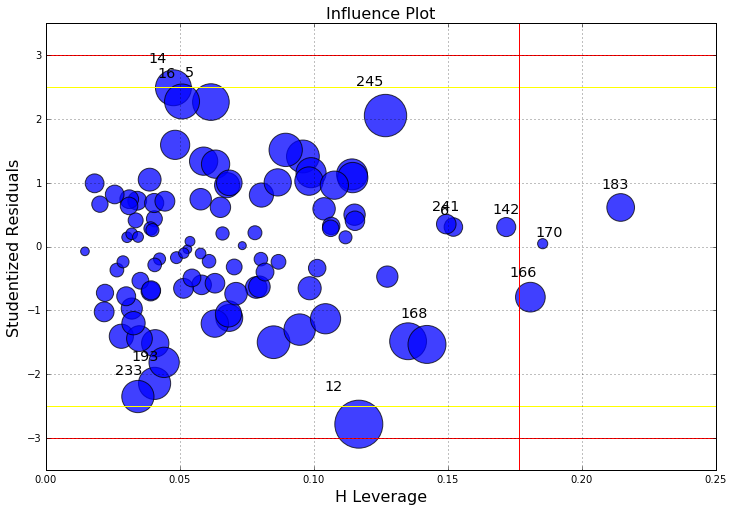

In [28]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(opt_fit, ax=ax)

plt.hlines([-3, 3], 0, 0.5, colors="red")
plt.hlines([-2.5, 2.5], 0, 0.5, colors="yellow")

leverage_warning = 2.5 * (6+1) / n
plt.vlines(leverage_warning, -3.5, 3.5, colors="red")

plt.grid()
plt.xlim(0, 0.25)
plt.ylim(-3.5, 3.5)
plt.show()

- 残差のt値の観点からみると，

t分布の全体の$95\%$から外れている標本は，

$$
num(e_t > t(\alpha=0.05/2, df=\phi_e)) = 7
$$

No. 5, 14, 16, 245, 193, 233, 12 である．

In [29]:
stats.t.isf(q=0.05/2, df=n-6-1)

1.9860863168388938

In [30]:
7/n

0.070707070707070704

大きくずれているとは判断しない．

テコ比の観点からみると，

$$
h_{kk} > 2.5 \times \bar{h_{kk}} = 0.17676
$$

モデルから大きく外れていると判断しない．

##### テコ比の二乗プロット Leverage-Resid2 Plot

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_plots.html

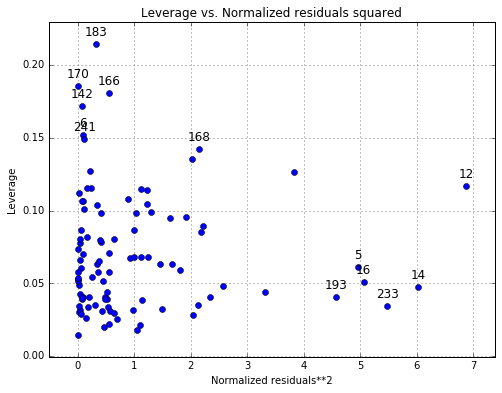

In [31]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.plot_leverage_resid2(opt_fit, ax=ax)
plt.grid()
plt.show()

### 回帰式の利用

#### statsmodelでの予測区間をチェック

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

In [32]:
len(opt_fit.predict())

99

In [33]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
print(wls_prediction_std.__doc__)

calculate standard deviation and confidence interval for prediction

    applies to WLS and OLS, not to general GLS,
    that is independently but not identically distributed observations

    Parameters
    ----------
    res : regression result instance
        results of WLS or OLS regression required attributes see notes
    exog : array_like (optional)
        exogenous variables for points to predict
    weights : scalar or array_like (optional)
        weights as defined for WLS (inverse of variance of observation)
    alpha : float (default: alpha = 0.05)
        confidence level for two-sided hypothesis

    Returns
    -------
    predstd : array_like, 1d
        standard error of prediction
        same length as rows of exog
    interval_l, interval_u : array_like
        lower und upper confidence bounds

    Notes
    -----
    The result instance needs to have at least the following
    res.model.predict() : predicted values or
    res.fittedvalues : values used in estim

In [34]:
predstd, interval_l, interval_u = wls_prediction_std(opt_fit)
print(interval_l)
len(interval_l)

0      56.428328
1      48.813746
2      57.966608
3      54.287337
4      49.652609
5      59.820461
6      65.440679
7      59.543331
9      57.342655
10     62.710921
11     64.314174
12     55.629091
13     55.081792
14     46.520321
15     43.729353
16     48.805830
17     49.213168
18     50.501777
19     50.979771
23     52.411092
142    46.419312
149    50.815912
150    49.572571
151    45.382171
152    47.253704
153    50.050765
154    48.849873
155    54.145220
157    39.402125
158    46.902481
         ...    
214    40.293192
215    43.025659
216    43.010622
217    44.430996
219    35.162666
220    44.605423
221    55.098431
222    56.761871
223    41.701600
224    47.022426
226    42.100115
227    37.852190
228    33.552965
229    43.844771
230    37.314934
232    33.683980
233    51.347037
234    39.145681
236    48.101525
237    49.640641
238    39.802467
239    39.981143
240    34.877651
241    30.380795
242    25.532088
243    22.467463
244    19.345381
245    19.1123

99

誤差棒付きでプロットする

http://tkyma.hatenablog.jp/entry/2015/11/30/010054

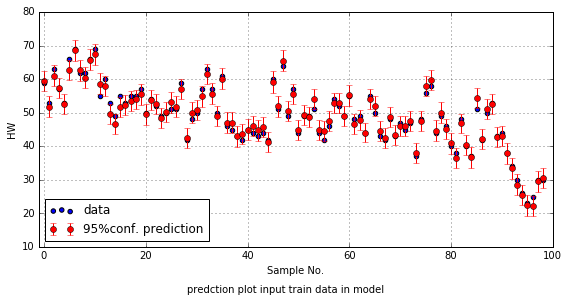

In [35]:
%matplotlib inline
plt.figure(figsize=(8, 4))

predstd, interval_l, interval_u = wls_prediction_std(opt_fit, alpha=0.05)
pred = opt_fit.predict()

# data
plt.scatter(sp.arange(len(pred)), opt_model.endog, label="data")
# prediction
plt.errorbar(x=sp.arange(len(pred)), y=pred, yerr=(interval_u.values-pred), fmt='ro', label="95%conf. prediction", color="red")

plt.grid()
plt.xlim(-1, 100)
plt.xlabel("Sample No.")
plt.ylabel("HW")
plt.legend(loc=3)
plt.suptitle("predction plot input train data in model", y=0)
plt.tight_layout()
plt.show()

信頼率$95\%$ の予測区間をみると，大きく外れている標本はないことを確認できる．

#### 信頼区間,予測区間を計算して予測

新たにキバハリアリによく似た標本を取得して，
HW以外を測定できたとき，

$$
HL = 58, ML = 47, WL=84,PrW=40,Ppl=26, GW=50
$$

のとき，$HW$ はどのような値で予測できるか

In [36]:
opt_fit.params

Intercept   -1.996450
HL           0.630358
ML           0.123491
WL          -0.100579
PrW          0.704231
PpL         -0.209999
GW           0.096536
dtype: float64

- 信頼区間

$\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$ は統計量から，
$\hat{y}$ の推定式の統計量は，

$$
\hat{HW} = \hat{\beta_0} + \hat{\beta_1} HL + \hat{\beta_2} ML + \hat{\beta_3}WL + \hat{\beta_4}PrW + \hat{\beta_5}PpL + \hat{\beta_6}GW
\sim
N(\beta_0 + \beta_1 HL + \beta_2 ML + \beta_3 WL + \beta_4 PrW + \beta_5 PpL + \beta_6 GW, \{ \frac{1}{n} + \frac{D^2}{n-1} \}\sigma^2 )
$$

推定式は，

$$
\hat{HW} = -2  + 0.6 HL + 0.1 ML -0.1 WL + 0.7 PrW-0.2 PpL + 0.1 GW
$$

信頼区間

$$
\hat{y_0} \pm t(\phi_e, \frac{\alpha}{2}) \sqrt{(\frac{1}{n} + \frac{D^2}{n-1}) \hat{\sigma^2}}
$$

マハラノビス距離の二乗は，

$$
    D^2 = (\vec{x} - \vec{\mu})^T \boldsymbol{\Sigma}^{-1} (\vec{x} - \vec{\mu})
$$

分散共分散行列を求める


In [37]:
# myrmesia_remNan_int[["HL", "ML", "WL", "PrW", "PpL", "GW"]]
Sigma = sp.asmatrix(myrmesia_remNan_int[["HL", "ML", "WL", "PrW", "PpL", "GW"]].cov().as_matrix())
Sigma

matrix([[  67.0861678 ,   43.81405896,   90.0600907 ,   47.65419501,
           27.39115646,   59.60090703],
        [  43.81405896,   56.22284065,   80.72830344,   39.76520305,
           25.572047  ,   47.96578025],
        [  90.0600907 ,   80.72830344,  160.9420738 ,   73.68965162,
           43.38249845,   93.68882705],
        [  47.65419501,   39.76520305,   73.68965162,   42.88455988,
           24.72325294,   51.96980004],
        [  27.39115646,   25.572047  ,   43.38249845,   24.72325294,
           18.06864564,   29.81385281],
        [  59.60090703,   47.96578025,   93.68882705,   51.96980004,
           29.81385281,   69.89198103]])

In [38]:
Sigma.shape

(6, 6)

In [39]:
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec = sp.asmatrix((vec_x - vec_mean).reshape(length, 1))
    inv = sp.linalg.inv(mat)
    mahala2 = vec.T.dot(inv.dot(vec))
    return mahala2[0, 0]

In [40]:
vec_mean = myrmesia_remNan_int[["HL", "ML", "WL", "PrW", "PpL", "GW"]].mean()
Mahala2([0,0,0,0,0,0], vec_mean, Sigma)

46.010425842783619

信頼区間のプロット

sample 1を例に予測



In [41]:
opt_fit.df_model

6.0

In [42]:
print(opt_fit.predict.__doc__)


        Call self.model.predict with self.params as the first argument.

        Parameters
        ----------
        exog : array-like, optional
            The values for which you want to predict.
        transform : bool, optional
            If the model was fit via a formula, do you want to pass
            exog through the formula. Default is True. E.g., if you fit
            a model y ~ log(x1) + log(x2), and transform is True, then
            you can pass a data structure that contains x1 and x2 in
            their original form. Otherwise, you'd need to log the data
            first.
        args, kwargs :
            Some models can take additional arguments or keywords, see the
            predict method of the model for the details.

        Returns
        -------
        prediction : ndarray or pandas.Series
            See self.model.predict

        


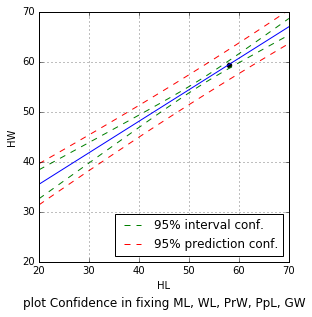

In [43]:
# HLを変えた予測値
%matplotlib inline
plt.figure(figsize=(4.5, 4.5))

# plt.scatter(x1, y)

hl_l = sp.linspace(20, 70, 100)
hat_y = []
# hl以外変数固定
(ml, wl, prw, ppl, gw) = (47, 84, 40, 26, 50)
for hl in hl_l:
    X = sp.array([1, hl, ml, wl, prw, ppl, gw])
    hat_y.append(X.dot(opt_fit.params))
plt.plot(hl_l, hat_y)

# interval
phi_e = n - opt_fit.df_model - 1
t_0025 = stats.t.isf(q=0.05/2, df=phi_e)
# マハラノビス距離の二乗
vec_mean = myrmesia_remNan_int[["HL", "ML", "WL", "PrW", "PpL", "GW"]].mean() # 平均ベクトル
D2 = []
for hl in hl_l:
    D2_0 = Mahala2([hl, ml, wl, prw, ppl, gw], vec_mean, Sigma)
    D2.append(D2_0)
D2 = sp.array(D2)

interval095 = t_0025 * sp.sqrt((1/n + D2 / (n-1)) * opt_fit.scale)
plt.plot(hl_l, hat_y - interval095, "--g", label="95% interval conf.")
plt.plot(hl_l, hat_y + interval095, "--g")

pred_interval095 = t_0025 * sp.sqrt((1 + 1/n + D2 / (n-1)) * opt_fit.scale)
plt.plot(hl_l, hat_y - pred_interval095, "--r", label="95% prediction conf.")
plt.plot(hl_l, hat_y + pred_interval095, "--r")

# sample HL=58 のとき
hl=58
X = sp.array([1, hl, ml, wl, prw, ppl, gw])
plt.scatter(hl, X.dot(opt_fit.params), color="k", )

plt.grid()
plt.axis("scaled")
plt.xlim(20, 70)
plt.ylim(20, 70)
plt.xlabel("HL")
plt.ylabel("HW")
plt.title("plot Confidence in fixing ML, WL, PrW, PpL, GW", y=- 0.2)
plt.legend(loc=4)
plt.tight_layout()
plt.show()

- 点推定

$$
\hat{HW} = 59
$$

In [44]:
hl=58
X = sp.array([1, hl, ml, wl, prw, ppl, gw])
hat_y = X.dot(opt_fit.params)
hat_y

59.455769058482389

- 予測区間


In [45]:
hl=58
D2_0 = Mahala2([hl, ml, wl, prw, ppl, gw], vec_mean, Sigma)

pred_interval095 = t_0025 * sp.sqrt((1 + 1/n + D2_0 / (n-1)) * opt_fit.scale)
hat_y - pred_interval095, hat_y, hat_y + pred_interval095 

(56.428328347011877, 59.455769058482389, 62.4832097699529)